### Imports

In [2]:
import pandas as pd
import hvplot.pandas

### Read in the hotel data

In [3]:
hotel_data = pd.read_csv('clean_hotel_data.csv')
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC,revenue
count,119374.000000,119374.000000,119374.000000,119374.000000,119374.000000,119374.000000,119374.000000,119374.000000,119370.000000,119374.000000,...,119193.000000,119193.000000,119193.000000,119193.000000,119193.000000,119193.000000,119193.000000,119193.000000,119193.000000,119374.000000
mean,0.370332,103.980121,2016.156709,27.163528,15.798867,0.927497,2.500084,1.853343,0.103904,0.007950,...,-0.008407,93.092511,4.827868,1.120083,18796.418311,157.645485,0.177316,41.151510,41970.578323,357.896171
std,0.482896,106.835955,0.707397,13.605287,8.780838,0.998619,1.908247,0.488802,0.398586,0.097443,...,0.095698,3.272055,0.278988,0.301915,400.931404,21.373507,0.023976,0.049977,426.678607,335.907070
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.200000,87.200000,4.300000,0.750000,17991.348000,113.400000,0.107059,41.100000,41182.000000,-63.800000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,-0.100000,91.000000,4.700000,1.000000,18425.306000,149.800000,0.165677,41.100000,41680.000000,146.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,93.100000,4.900000,1.000000,18775.459000,161.100000,0.183547,41.200000,41850.000000,267.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.100000,96.300000,5.000000,1.250000,19148.194000,171.500000,0.189821,41.200000,42274.000000,446.380000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,10.000000,...,0.100000,98.500000,5.700000,1.750000,19561.896000,204.200000,0.236504,41.200000,42834.000000,7590.000000


## Create a true DateTime column as index

In [4]:
# Hotel stay arrival dates are broken up into separate columns of strings and ints
# First step, convert year to string 
hotel_data['arrival_date_year']=hotel_data['arrival_date_year'].astype(str)
# Convert day of month to string also
hotel_data['arrival_date_day_of_month']=hotel_data['arrival_date_day_of_month'].astype(str)
# Combine year, month, day of month into one column in style 2016-July-5
hotel_data['arrival_date_str']=hotel_data['arrival_date_year']+"-"+hotel_data['arrival_date_month']+"-"+hotel_data['arrival_date_day_of_month']
# Convert the string date column into DateTime
hotel_data['arrival_date']=pd.to_datetime(hotel_data['arrival_date_str'])
# Drop the string column
hotel_data=hotel_data.drop(['arrival_date_str'],axis='columns')
# Set index to DateTime
hotel_data=hotel_data.set_index('arrival_date')

## Calculating revenue of the stays

In [5]:
#calculating the stay revenue based on the AverageDailyRate and the number of days of the stay
hotel_data['revenue']=hotel_data['adr']*(hotel_data['stays_in_weekend_nights']+hotel_data['stays_in_week_nights'])

## Checking the data for issues with later analysis

<Axes: xlabel='adults'>

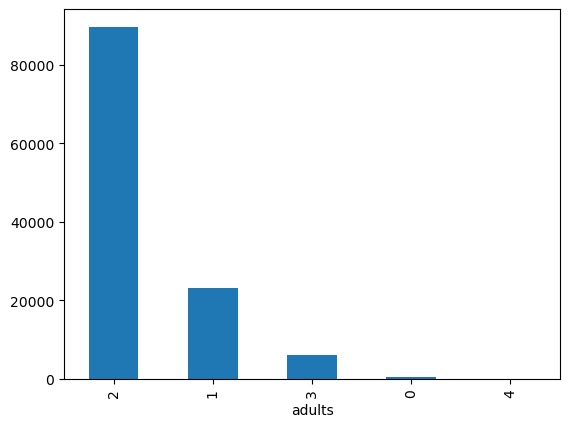

In [6]:
# Checking the adults column
display(hotel_data['adults'].value_counts().plot(kind='bar'))    
# The stays with large groups will cause issues later, eliminating all stays > 5 adults
hotel_data = hotel_data[hotel_data['adults']<5]


In [7]:
# Confirm filtered
hotel_data['adults'].value_counts()

adults
2    89680
1    23027
3     6202
0      403
4       62
Name: count, dtype: int64

<Axes: xlabel='adults'>

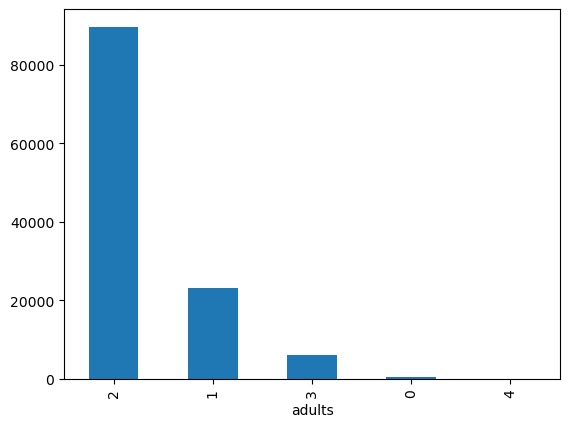

In [8]:
# Graph looking better
hotel_data['adults'].value_counts().plot(kind='bar')         

<Axes: xlabel='children'>

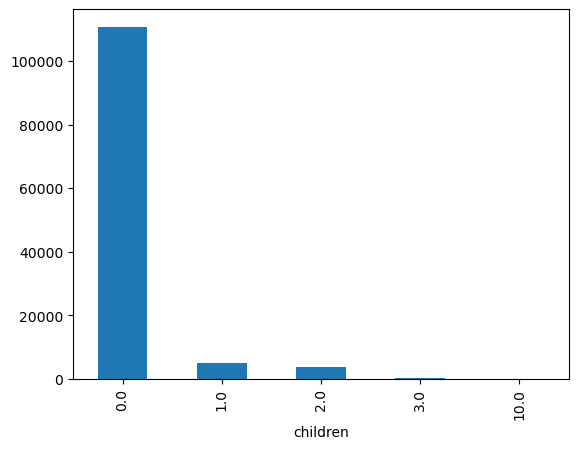

In [9]:
#Checking children, seems ok
hotel_data['children'].value_counts().plot(kind='bar')         

<Axes: xlabel='babies'>

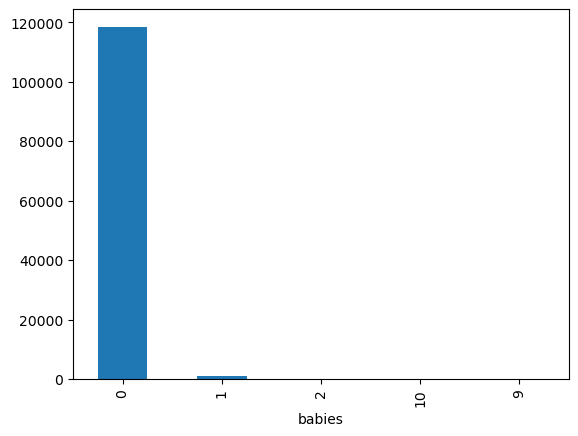

In [10]:
# Checking # of babies, seems ok 
hotel_data['babies'].value_counts().plot(kind='bar')         

<Axes: xlabel='countries'>

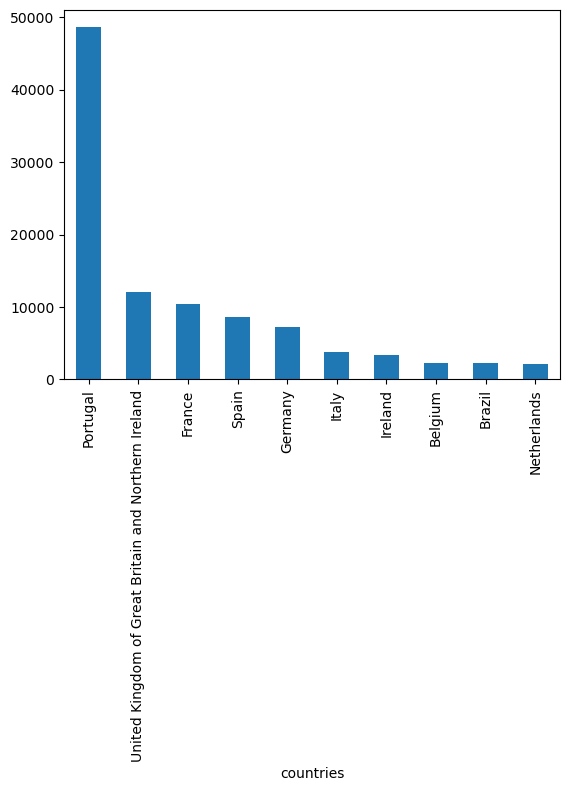

In [13]:
#Checking customer country of residence
countries=pd.read_csv('all.csv')
countries=countries.set_index('alpha-3')
hotel_data['countries']=pd.merge(hotel_data['country'],countries['name'],how='left',left_on='country',right_on=countries.index)['name'].values
hotel_data['countries']
hotel_data['countries'].value_counts().iloc[0:10].plot(kind='bar') 

<Axes: xlabel='market_segment'>

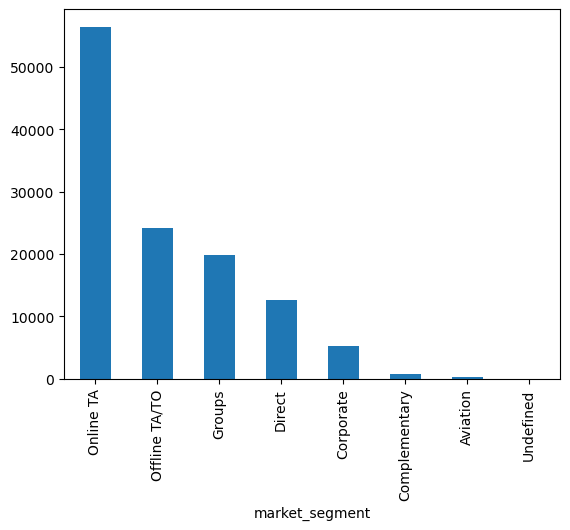

In [14]:
#Checking customer type 
hotel_data['market_segment'].value_counts().plot(kind='bar')         

<Axes: xlabel='distribution_channel'>

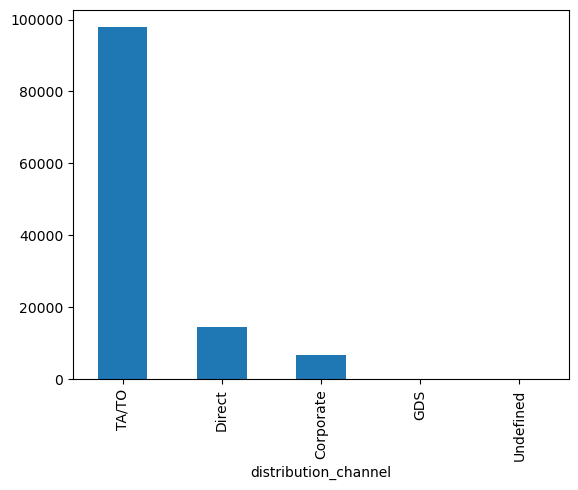

In [15]:
#Checking booking distribution channel
hotel_data['distribution_channel'].value_counts().plot(kind='bar')         

<Axes: xlabel='reserved_room_type'>

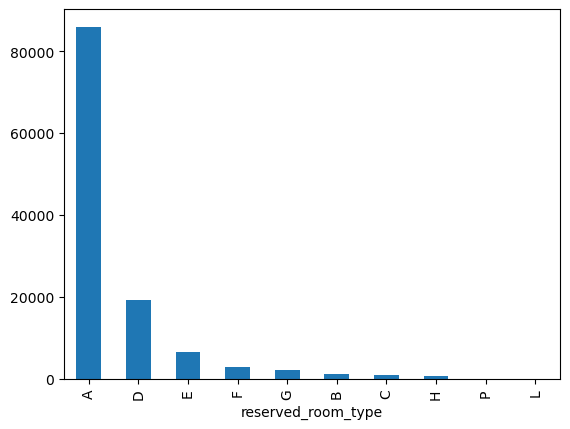

In [16]:
# Reviewing reserved room type
hotel_data['reserved_room_type'].value_counts().plot(kind='bar')         

<Axes: xlabel='assigned_room_type'>

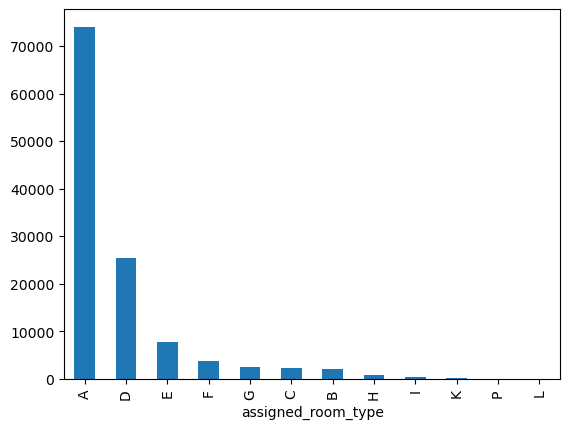

In [17]:
# Reviewing assigned room type
hotel_data['assigned_room_type'].value_counts().plot(kind='bar')       

In [18]:
# Reviewing customer type
print(hotel_data['customer_type'].value_counts())                              

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                561
Name: count, dtype: int64


In [19]:
#ADR is the Average daily rate per stay, so important for revenue calcs
hotel_data['adr'].hvplot.hist(ylog=True,bins=100,xlim=[0,500])                        

:Histogram   [adr]   (adr_count)

In [20]:
# Trying to identify why revenue is zero for some stays. Couldn't identify it.
hotel_data[hotel_data['revenue']==0].describe().iloc[:,0:17]
#come back and look for why revenue =0

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1005.000000,1943.000000,1943.0,1943.000000,1943.000000
mean,0.101390,37.197118,28.788986,0.386516,1.220793,1.412764,0.067422,0.012867,0.275862,0.097787,0.848173,0.501801,104.401990,1.326814,0.0,0.055584,0.595986
std,0.301922,77.246577,15.202571,1.020068,2.304149,0.659621,0.322650,0.112728,0.447063,0.523112,3.296396,1.353894,117.612765,11.652925,0.0,0.229176,0.860463
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,4.000000,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,31.000000,42.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,240.000000,0.000000,0.0,0.000000,1.000000
max,1.000000,737.000000,53.000000,14.000000,35.000000,4.000000,3.000000,1.000000,1.000000,5.000000,32.000000,21.000000,531.000000,150.000000,0.0,1.000000,4.000000


### Per-Hotel Revenue

In [21]:
revenue_data=pd.DataFrame()
resort_data=hotel_data[hotel_data['hotel']=='Resort Hotel']
city_data=hotel_data[hotel_data['hotel']=='City Hotel']
revenue_data['resort']=resort_data['revenue'].groupby('arrival_date').sum()
revenue_data['city']=city_data['revenue'].groupby('arrival_date').sum()
display(revenue_data.hvplot.line())

c:\Users\vicky\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
c:\Users\vicky\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [Variable]
   :Curve   [arrival_date]   (value)

## Export data to clean csv

In [22]:
hotel_data.to_csv('clean_hotel_data.csv')

## Start of ARIMA forecasting of revenue

c:\Users\vicky\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vicky\AppData\Local\Temp\ipykernel_14508\2037775533.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_revenue=pd.concat([revenue,future_datest_df])


<Axes: >

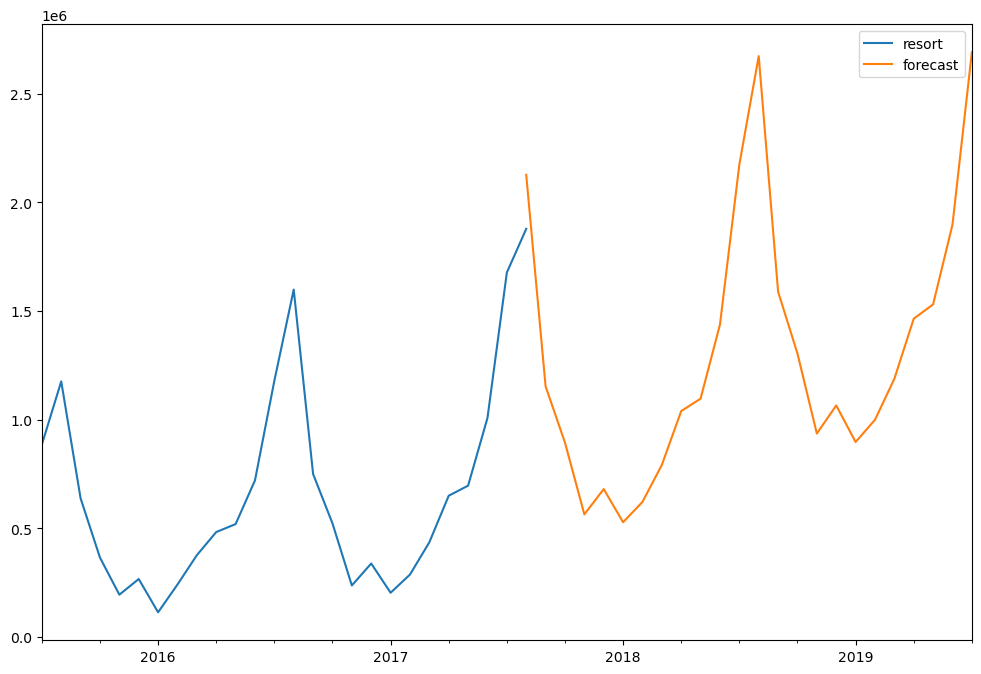

In [23]:
#rolling revenue into monthly https://stackoverflow.com/questions/24082784/pandas-dataframe-groupby-datetime-month
revenue=pd.DataFrame(revenue_data['resort'].groupby(pd.Grouper(freq='M')).sum())
#utilizing ARIMA to forecast forward https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(revenue,order=(1, 1, 0),seasonal_order=(1,1,1,12))
results=model.fit()
future_dates=[revenue.index[-1]+ pd.tseries.offsets.DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=revenue.columns)
future_datest_df.tail()
future_revenue=pd.concat([revenue,future_datest_df])
future_revenue['forecast'] = results.predict(start = 25, end = 25+24, dynamic= True)  
future_revenue[['resort', 'forecast']].plot(figsize=(12, 8)) 

c:\Users\vicky\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vicky\AppData\Local\Temp\ipykernel_14508\2911786895.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_revenue=pd.concat([revenue,future_datest_df])


<Axes: >

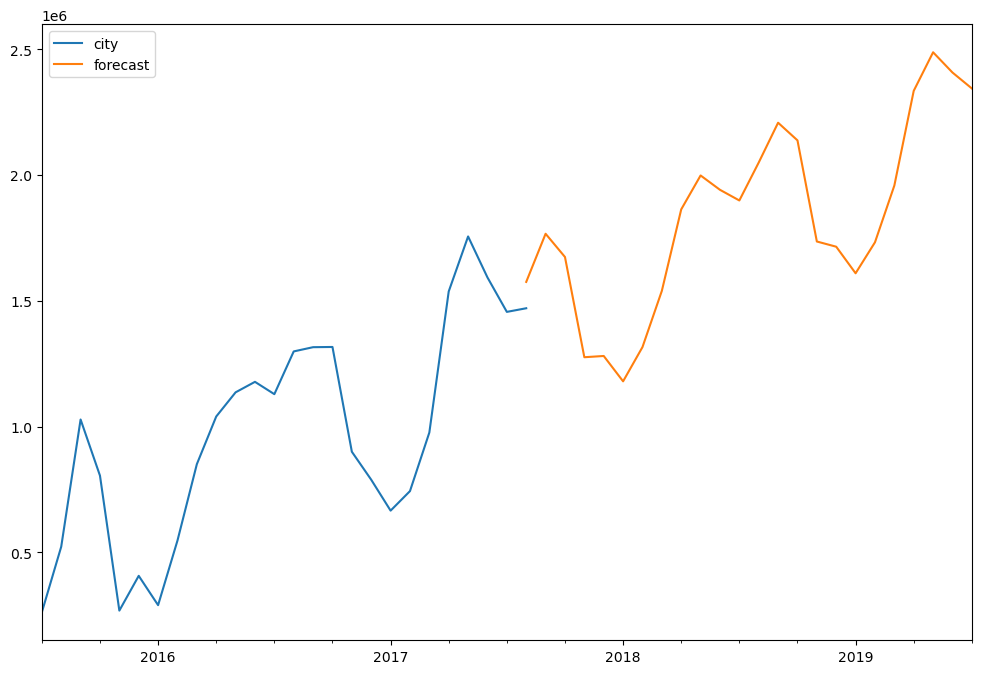

In [24]:
#rolling revenue into monthly https://stackoverflow.com/questions/24082784/pandas-dataframe-groupby-datetime-month
revenue=pd.DataFrame(revenue_data['city'].groupby(pd.Grouper(freq='M')).sum())
#utilizing ARIMA to forecast forward https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(revenue,order=(1, 1, 0),seasonal_order=(1,1,1,12))
results=model.fit()
future_dates=[revenue.index[-1]+ pd.tseries.offsets.DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=revenue.columns)
future_datest_df.tail()
future_revenue=pd.concat([revenue,future_datest_df])
future_revenue['forecast'] = results.predict(start = 25, end = 25+24, dynamic= True)  
future_revenue[['city', 'forecast']].plot(figsize=(12, 8)) 

c:\Users\vicky\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vicky\AppData\Local\Temp\ipykernel_14508\2911786895.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_revenue=pd.concat([revenue,future_datest_df])


<Axes: >

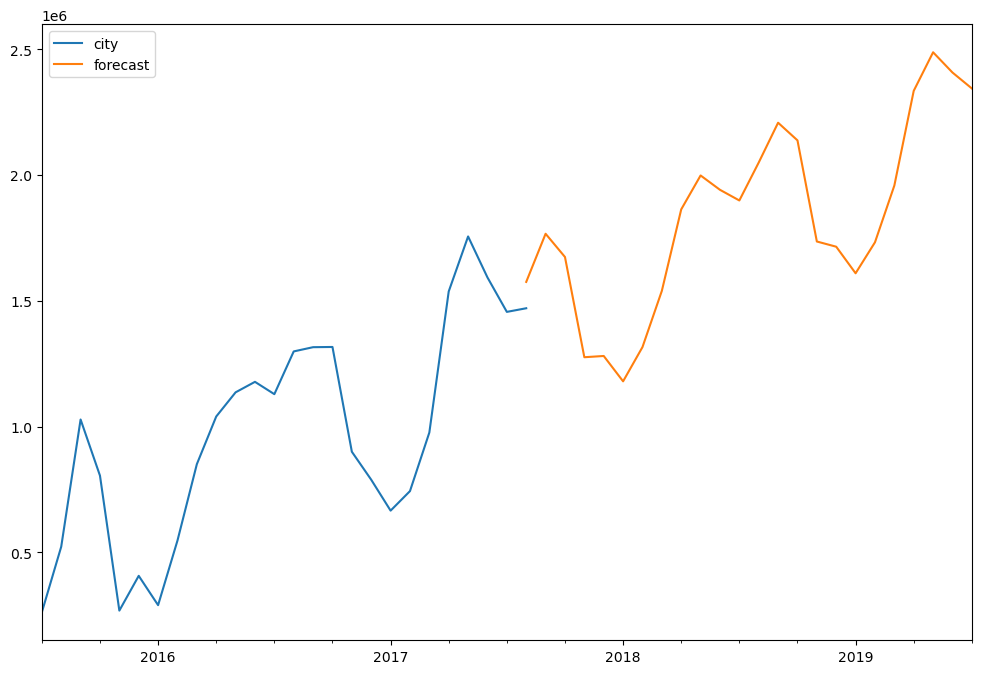

In [25]:
#rolling revenue into monthly https://stackoverflow.com/questions/24082784/pandas-dataframe-groupby-datetime-month
revenue=pd.DataFrame(revenue_data['city'].groupby(pd.Grouper(freq='M')).sum())
#utilizing ARIMA to forecast forward https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(revenue,order=(1, 1, 0),seasonal_order=(1,1,1,12))
results=model.fit()
future_dates=[revenue.index[-1]+ pd.tseries.offsets.DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=revenue.columns)
future_datest_df.tail()
future_revenue=pd.concat([revenue,future_datest_df])
future_revenue['forecast'] = results.predict(start = 25, end = 25+24, dynamic= True)  
future_revenue[['city', 'forecast']].plot(figsize=(12, 8)) 

In [26]:
# Create a Grouper Function
hotel_data['revenue'].groupby(pd.Grouper(freq='M')).sum().hvplot.bar(
    rot=45,
    ).opts(
    color="blue",
    hover_color="red",
)

c:\Users\vicky\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Bars   [arrival_date]   (revenue)

In [27]:
# Create City Hotel REV Chart
from bokeh.models import DatetimeTickFormatter
from bokeh.models import NumeralTickFormatter
month_formatter = DatetimeTickFormatter(years=['%b-%Y'])
revenue_formatter = NumeralTickFormatter(format="$0,0")
display(revenue_data['city'].groupby(pd.Grouper(freq='M')).sum().hvplot.bar(rot=90,xformatter=month_formatter,yformatter=revenue_formatter,color="Green"))
city_df= (revenue_data['city'].groupby(pd.Grouper(freq='M')).sum().hvplot.bar(rot=90,xformatter=month_formatter,yformatter=revenue_formatter,color="Green"))


c:\Users\vicky\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Bars   [arrival_date]   (city)

In [28]:
# Create Resort Hotel REV Chart
from bokeh.models import DatetimeTickFormatter
from bokeh.models import NumeralTickFormatter
month_formatter = DatetimeTickFormatter(years=['%b-%Y'])
revenue_formatter = NumeralTickFormatter(format="$0,0")
display(revenue_data['resort'].groupby(pd.Grouper(freq='M')).sum().hvplot.bar(rot=90,xformatter=month_formatter,yformatter=revenue_formatter, color="Red"))
resort_df = (revenue_data['resort'].groupby(pd.Grouper(freq='M')).sum().hvplot.bar(rot=90,xformatter=month_formatter,yformatter=revenue_formatter, color="Red"))

c:\Users\vicky\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Bars   [arrival_date]   (resort)

In [29]:
# Combine Data Frames
resort_df + city_df

c:\Users\vicky\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
c:\Users\vicky\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Layout
   .Bars.Resort :Bars   [arrival_date]   (resort)
   .Bars.City   :Bars   [arrival_date]   (city)